In [19]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from imblearn.under_sampling import TomekLinks
from IPython.display import Markdown, display
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
def printmd(string):
    display(Markdown(string))

In [20]:
# Reading the training File
df = pd.read_csv('train.csv')

# How many features in the data set?

In [21]:
columnNames = df.columns
print(columnNames)
feature = len(df.columns)
print('The total number of features are ', feature-2)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


# How many categorical,binary and continuous variable?

In [22]:
import re
categorical = 0
categorical_features = []
binary = 0
binary_features = []
continuous = 0
continuous_features = []
for each in columnNames[2:]:
    if(re.search(r'cat$',each)):
        categorical = categorical+1
        categorical_features.append(each)
    elif (re.search(r'bin$',each)):
        binary = binary+1
        binary_features.append(each)
    else:
        continuous = continuous+1
        continuous_features.append(each)

print('Total categorical features are ', categorical)
print('Total binary features are ', binary)
print('Total continuous features are ', continuous)

Total categorical features are  14
Total binary features are  17
Total continuous features are  26


With the continuous features we can do a correlation analysis and also do a PCA to see which feature impacts the most

# Description of the data

In [23]:
pd.options.display.max_seq_items = 2000
HTML(df.describe().to_html())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

Above we can see the descriptive statistics of the data set

# Distribution of the class

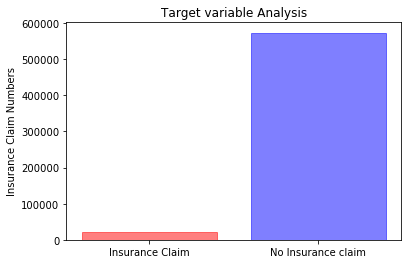

Total number of people who claimed inurance  21694
Total number of people who DO NOT claimed inurance  573518
Total number of customers 595212


In [24]:
objects = ('Insurance Claim', 'No Insurance claim')
y_pos = np.arange(len(objects))
t1 = df.target.sum()
t2 = len(df)-df.target.sum()
barlist = plt.bar(y_pos,[t1,t2],align='center', alpha=0.5)
barlist[0].set_color('r')
barlist[1].set_color('b')
plt.xticks(y_pos, objects)
plt.ylabel('Insurance Claim Numbers')
plt.title('Target variable Analysis')
plt.show()
print('Total number of people who claimed inurance ' , t1 )
print('Total number of people who DO NOT claimed inurance ' , t2)
print ('Total number of customers', t1+t2)

We observe that there is class imbalance, we might need to downsample or upsample to make the classes balanced

# Binary variable analysis

The concept here is to see, how does the binary variable plays the role in the prediction of final outcome. We will try to see the behavior of all binary variables.

**Analysis of Variable **ps_ind_06_bin

,Target is 0,Target is 1
ps_ind_06_bin=0,58.104675,2.521119
ps_ind_06_bin=1,38.250573,1.123633


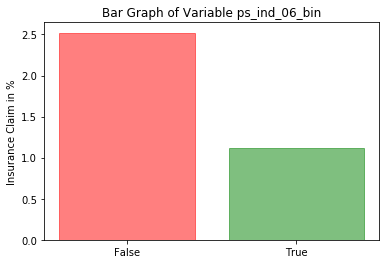

**Analysis of Variable **ps_ind_07_bin

,Target is 0,Target is 1
ps_ind_07_bin=0,71.869015,2.427706
ps_ind_07_bin=1,24.486233,1.217045


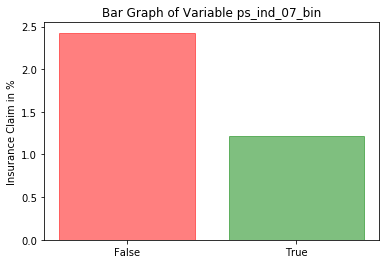

**Analysis of Variable **ps_ind_08_bin

,Target is 0,Target is 1
ps_ind_08_bin=0,80.651768,2.956090
ps_ind_08_bin=1,15.703480,0.688662


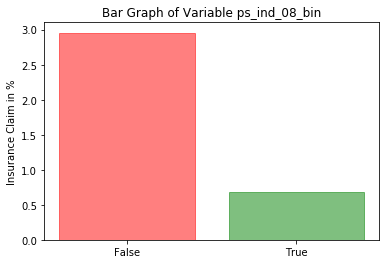

**Analysis of Variable **ps_ind_09_bin

,Target is 0,Target is 1
ps_ind_09_bin=0,78.440287,3.029341
ps_ind_09_bin=1,17.914961,0.615411


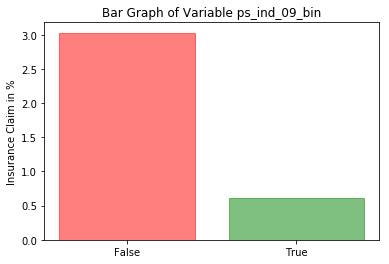

**Analysis of Variable **ps_ind_10_bin

,Target is 0,Target is 1
ps_ind_10_bin=0,96.319967,3.642736
ps_ind_10_bin=1,0.035282,0.002016


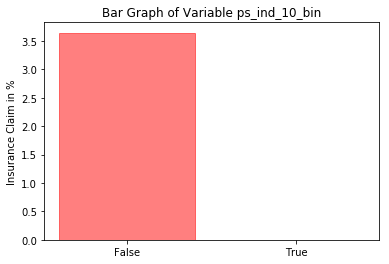

**Analysis of Variable **ps_ind_11_bin

,Target is 0,Target is 1
ps_ind_11_bin=0,96.193793,3.637023
ps_ind_11_bin=1,0.161455,0.007728


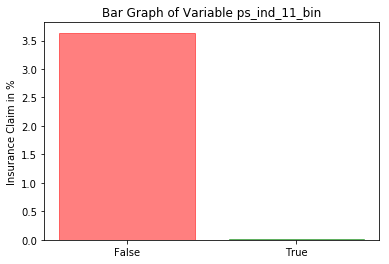

**Analysis of Variable **ps_ind_12_bin

,Target is 0,Target is 1
ps_ind_12_bin=0,95.459937,3.596198
ps_ind_12_bin=1,0.895311,0.048554


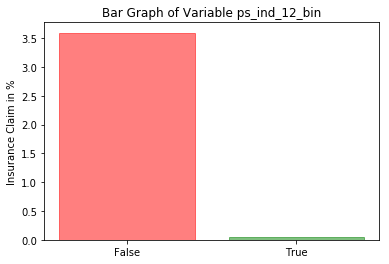

**Analysis of Variable **ps_ind_13_bin

,Target is 0,Target is 1
ps_ind_13_bin=0,96.265364,3.639880
ps_ind_13_bin=1,0.089884,0.004872


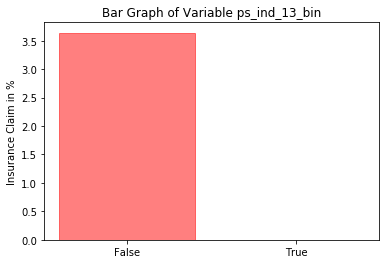

**Analysis of Variable **ps_ind_16_bin

,Target is 0,Target is 1
ps_ind_16_bin=0,32.434998,1.482665
ps_ind_16_bin=1,63.920250,2.162087


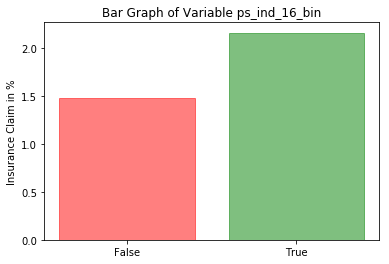

**Analysis of Variable **ps_ind_17_bin

,Target is 0,Target is 1
ps_ind_17_bin=0,84.914955,2.976923
ps_ind_17_bin=1,11.440294,0.667829


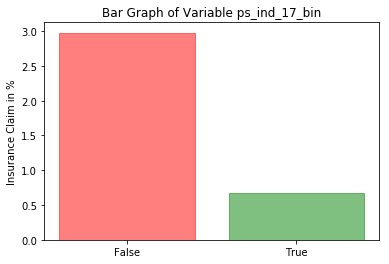

**Analysis of Variable **ps_ind_18_bin

,Target is 0,Target is 1
ps_ind_18_bin=0,81.600673,3.054710
ps_ind_18_bin=1,14.754575,0.590042


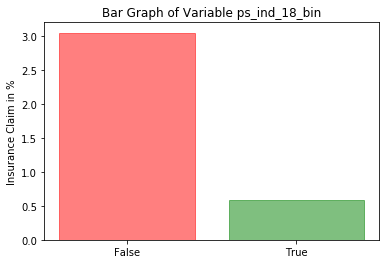

**Analysis of Variable **ps_calc_15_bin

,Target is 0,Target is 1
ps_calc_15_bin=0,84.555755,3.201548
ps_calc_15_bin=1,11.799493,0.443203


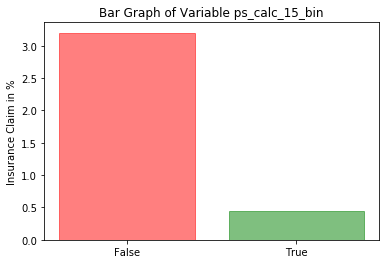

**Analysis of Variable **ps_calc_16_bin

,Target is 0,Target is 1
ps_calc_16_bin=0,35.865204,1.350779
ps_calc_16_bin=1,60.490044,2.293973


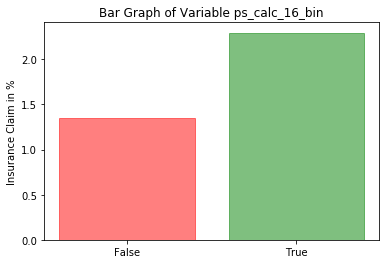

**Analysis of Variable **ps_calc_17_bin

,Target is 0,Target is 1
ps_calc_17_bin=0,42.955283,1.626479
ps_calc_17_bin=1,53.399965,2.018272


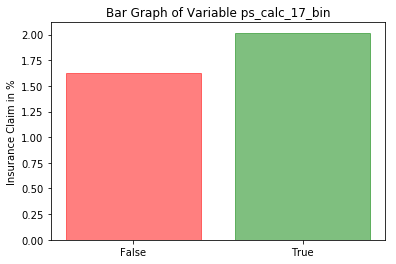

**Analysis of Variable **ps_calc_18_bin

,Target is 0,Target is 1
ps_calc_18_bin=0,68.688467,2.593362
ps_calc_18_bin=1,27.666781,1.051390


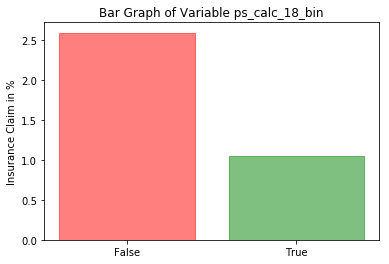

**Analysis of Variable **ps_calc_19_bin

,Target is 0,Target is 1
ps_calc_19_bin=0,62.709421,2.388225
ps_calc_19_bin=1,33.645827,1.256527


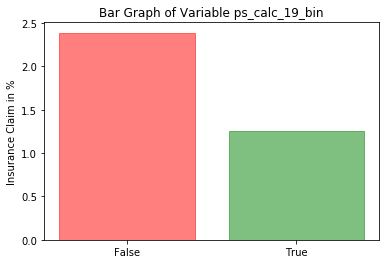

**Analysis of Variable **ps_calc_20_bin

,Target is 0,Target is 1
ps_calc_20_bin=0,81.574968,3.093184
ps_calc_20_bin=1,14.780280,0.551568


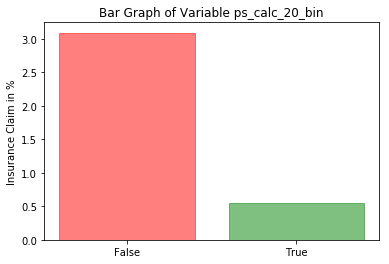

In [25]:

length = len(df)        
for each in binary_features:
    dftemp = df[df[each] == 0].target
    t01 = dftemp.sum()
    t00 = len(dftemp)-t01 
   
    dftemp = df[df[each] == 1].target
    t11 = dftemp.sum()
    t10 = len(dftemp)-t11 
    my_columns = ["Target is 0", "Target is 1 "]
    t00 = (t00/length) *100
    t01 = (t01/length) *100
    t10 = (t10/length) *100
    t11 = (t11/length) *100
    dfmat = pd.DataFrame([[t00,t01], [t10,t11]])
    dfmat.columns = my_columns
    dfmat.index = [each + '=0', each + '=1']
    printmd('**Analysis of Variable **'+str(each))
    #f, axarr = plt.subplots(1, 2)
    display(dfmat)
    objects = ('False', 'True')
    y_pos = np.arange(len(objects))
    barlist = plt.bar(y_pos,[t01,t11],align='center', alpha=0.5)
    barlist[0].set_color('r')
    barlist[1].set_color('g')
    plt.xticks(y_pos, objects)
    plt.ylabel('Insurance Claim in %')
    plt.title('Bar Graph of Variable '+str(each))
    plt.show()
    
    
  

From the above analysis we can observe following -    
1) 'ps_ind_08_bin' variable plays a crucial role on the target variable, 0ut of 3.5 %, 2.9% did not files a claim when   'ps_ind_08_bin' is false and 0.6% filed claim when it is true. Hence a good variable to learn.       
2) Same for the variables, 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin'. Aslo, 'ps_calc_15_bin' and 'ps_ind_20_bin' have a strong association with the target variable.      
3) String association means that how the target variable switches between 0 and 1 with respect to the binary input.    
4) Please note that since we have binary variable on both sides, feature space and target space, it is irrelevant to talk about the correlation, rather we can try to estimate how strong an input variable is associated with the output.  

# Pearson correlation among the continuous variable

It will be nice to see that if there is any strong correlation among the continuous variable of the data set. To achieve the pearson correlation among different variables. A dataframe of all continuous variable is created.

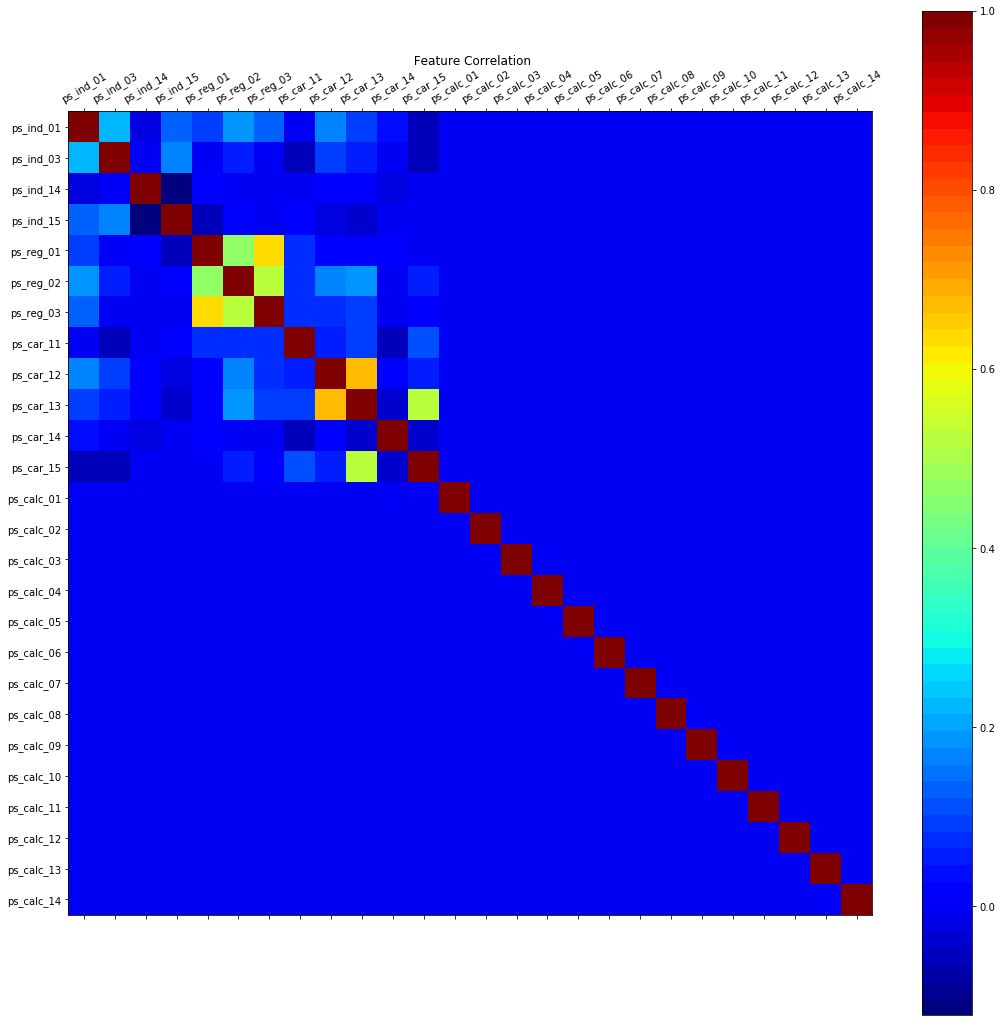

In [26]:
continuousdf = df[continuous_features]
xps = continuousdf.corr()
cmap = cm.get_cmap('jet', 60)
plt.figure(figsize=(18,18))
plt.matshow(xps, cmap=cmap, fignum =1)
clb = plt.colorbar()
#clb.ax.set_title('This is a title')
columns = list(xps)
x_pos = np.arange(len(columns))
y_pos = np.arange(len(columns))
plt.title(' Feature Correlation')
plt.yticks(y_pos,columns)
plt.xticks(x_pos,columns, rotation = 30)
plt.show()


From the above matrix it is very clear that the following variables have a strong correlation-    
1) 'ps_car_15' with 'ps_car_13', a strong positive correlation is found.    
2) 'ps_car_13' with 'ps_car_12', a strong positive correlation is found.      
3) 'ps_reg_03' with 'ps_reg_01' and 'ps_reg_02', a strong positive correlation is found.       

The data is anonymized, so it is hard to determine what does each of these variable means. For example, variable 'ps_reg_03', might 
have to do something with the registering of the user in a  certain region in Brazil. PS must have divided the Brazil into different
regions and these variables are the indicators.


# Story of Categorical variables

It is time to explore the behavior of the categorical variables. There are 2 assumptions for the categorical variables-     
1) The categorical variable are independent, it means that the variables are something like car categories and are independent to each other and to target as well.           
2) The categorical variables are dependent and correlated with target. It means that the variable present something like the driving 
citations from the cops. Some customers might have 4 -5 tickets/citation for reckless driving or for any other reason and those cutomers
are kept in the high risk area. Customers with 2-3 tickets are kept in moderate area and customers with 0 to 1 tickets are kept
in safe zone. 

If second assumption is true, then there is suppose to be a strong correlation with the target variable. There are a total of 14 
categorical features.     

The best way to check a correlation among categorical and binary variable is to conduct a polychoric correlation. However, there 
is no library or package which estimates polychoric, hence this idea is dropped.    

To check if our second assumption is correct, we can assume the categorical to be continuous variable and use point biserial 
correlation coefficient from scipy package, which calculate correlation between the binary and continuous variables. This will 
solve the purpose.

In [27]:
# Creating the list of all features which is need to be analyzed.
featuresCorr = []
featuresCorr = categorical_features
featuresCorr.append('target')
print('The List of features are -' ,featuresCorr)


The List of features are - ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'target']


In [28]:
df2 = df[featuresCorr]
df3 = df2.replace(-1,np.nan)
df4 = df3.dropna(axis=0, how='any')
a = np.arange(7)
b = np.arange(7)
# Calculating the correlation between the input variables and the target variables using the pointbiserialr
for i in range(0,14):
    print('Correlation between the ', featuresCorr[i], ' and target variable is -')
    print(stats.pointbiserialr(np.array(df4.iloc[:,i]), np.array(df4.target)))

Correlation between the  ps_ind_02_cat  and target variable is -
PointbiserialrResult(correlation=0.00192895313131675, pvalue=0.42358069459123648)
Correlation between the  ps_ind_04_cat  and target variable is -
PointbiserialrResult(correlation=0.012655235719492047, pvalue=1.5191835166562875e-07)
Correlation between the  ps_ind_05_cat  and target variable is -
PointbiserialrResult(correlation=0.036196809925362811, pvalue=5.339450563331895e-51)
Correlation between the  ps_car_01_cat  and target variable is -
PointbiserialrResult(correlation=0.025120540252541786, pvalue=1.94979462096242e-25)
Correlation between the  ps_car_02_cat  and target variable is -
PointbiserialrResult(correlation=-0.038698133791200025, pvalue=4.8742786655803853e-58)
Correlation between the  ps_car_03_cat  and target variable is -
PointbiserialrResult(correlation=0.021762917713870702, pvalue=1.726331573165454e-19)
Correlation between the  ps_car_04_cat  and target variable is -
PointbiserialrResult(correlation=0.0

# PCA (Principal Component Analysis)

Let's do PCA now and see, if we can reduce the dimensionality of the data. PCA is done on the continuous variables at first.

In [29]:
continuousdf = continuousdf.replace(-1,np.nan).dropna(axis=0, how='any')
#convert it to numpy arrays
X=continuousdf.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=26)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=26, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print('The explained variance ratio is')
pca.explained_variance_ratio_

The explained variance ratio is


array([ 0.10248759,  0.06465218,  0.0521895 ,  0.04559436,  0.03975049,
        0.03880654,  0.03876262,  0.0386666 ,  0.0385952 ,  0.03855317,
        0.038525  ,  0.03845293,  0.03844286,  0.03838487,  0.03836366,
        0.03830918,  0.03828881,  0.03819727,  0.03804629,  0.0365874 ,
        0.03238999,  0.02976958,  0.02737118,  0.01574812,  0.0083614 ,
        0.00670323])

[  10.25   16.72   21.94   26.5    30.48   34.36   38.24   42.11   45.97
   49.83   53.68   57.53   61.37   65.21   69.05   72.88   76.71   80.53
   84.33   87.99   91.23   94.21   96.95   98.52   99.36  100.03]


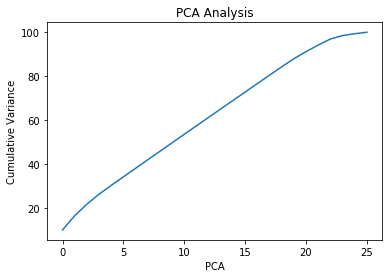

In [31]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)
plt.title('PCA Analysis')
plt.ylabel('Cumulative Variance')
plt.xlabel('PCA')
plt.show()

From the above analysis, we have found that with 24 PC are good enough to capture all the variance in the data.     
After 24 PCA there is not much difference in variance. But if we choose 24, we are still not able to reduce the dimensionality of data at large. So we plan to stick with the 5 PC only.

In [32]:
pca = PCA(n_components=24)
pca.fit(X)
X1=pca.fit_transform(X)
X1.shape

(453046, 24)

# Down sampling of Training Set

Our training data is highly imbalanced with only 3% of user data who has claimed an insurance.      
Approach is to under sample the 'No Claim' class and bring the sample numbers equivalent to the 'Claim' class.           
Tomek links is used to down sample the data. Tomek Links create clusters of classes representing different data points, 
Now tomek links are defined as the links which exist if the two samples are the nearest neighbors of each other.     
Hence, training data is under sampled and represent only unique samples.
We will try running this algorithm and see how much it under samples.

In [33]:
target = df.target
train = df[columnNames[2:]]

In [34]:
# Converting all the missing values to the zero-
train = train.replace(-1,0)


In [227]:
tl = TomekLinks(return_indices=True)
train_resampled, target_resampled, idx_resampled = tl.fit_sample(train, target)
print(train_resampled.shape)

(588710, 57)


In [231]:
idx_samples_removed = np.setdiff1d(np.arange(train.shape[0]),idx_resampled)

In [233]:
len(idx_samples_removed)

6502

As we can see from the above analysis that we are not able to remove or clean a significant number of samples. Only 6502 samples
are removed, which are not significant at all.      

Our best shot is to do a random undersampling of training data set and balance the classes.

# In-depth analysis of Continuous Variables-

The objective is to see of there is a significant difference amomg the continuous variabes.             
The data from training file is divided into the two groups.            
1) The First group represents all the samples of people who have not claimed the insurance.              
2) The Second group represents all the samokes of people who have claimed the insurance.

**Analysis of Variable **ps_ind_01

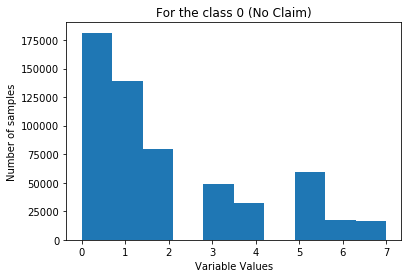

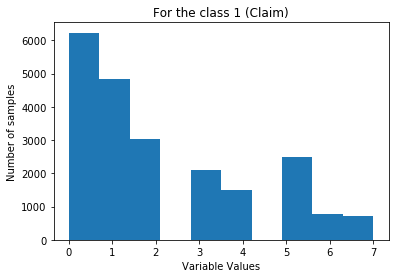

The Mean for the variable  ps_ind_01  is  1.89321346497 for class 0 and  1.89321346497 for class 1 respectively
The STD for the variable  ps_ind_01  is  1.98118932452 for class 0 and  1.98118932452 for class 1 respectively


**Analysis of Variable **ps_ind_03

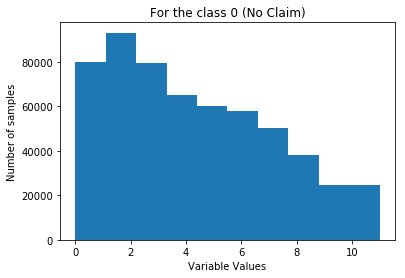

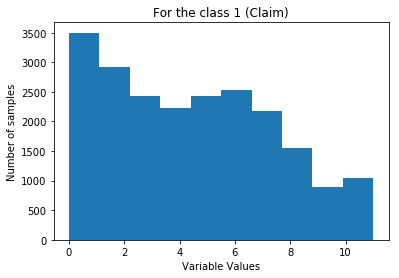

The Mean for the variable  ps_ind_03  is  4.41892843817 for class 0 and  4.41892843817 for class 1 respectively
The STD for the variable  ps_ind_03  is  2.69624570627 for class 0 and  2.69624570627 for class 1 respectively


**Analysis of Variable **ps_ind_14

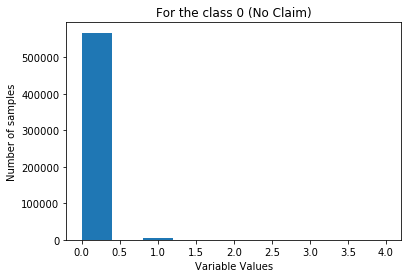

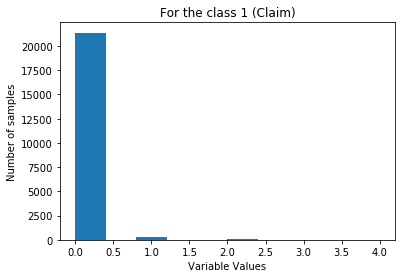

The Mean for the variable  ps_ind_14  is  0.012266397916 for class 0 and  0.012266397916 for class 1 respectively
The STD for the variable  ps_ind_14  is  0.126480311862 for class 0 and  0.126480311862 for class 1 respectively


**Analysis of Variable **ps_ind_15

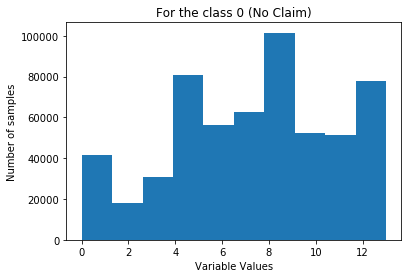

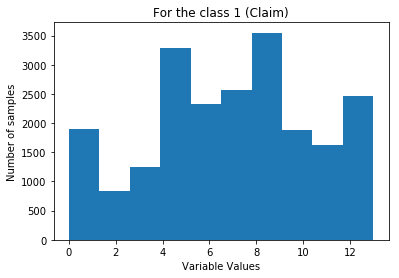

The Mean for the variable  ps_ind_15  is  7.31475385254 for class 0 and  7.31475385254 for class 1 respectively
The STD for the variable  ps_ind_15  is  3.54472457532 for class 0 and  3.54472457532 for class 1 respectively


**Analysis of Variable **ps_reg_01

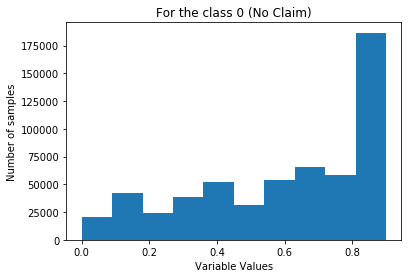

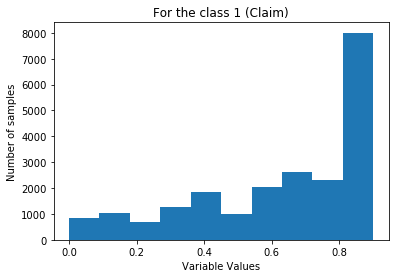

The Mean for the variable  ps_reg_01  is  0.609710941941 for class 0 and  0.609710941941 for class 1 respectively
The STD for the variable  ps_reg_01  is  0.287945572587 for class 0 and  0.287945572587 for class 1 respectively


**Analysis of Variable **ps_reg_02

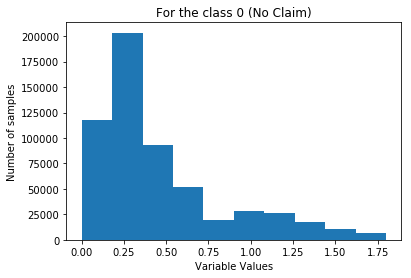

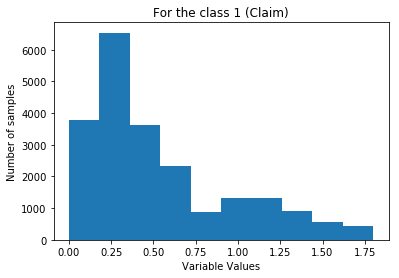

The Mean for the variable  ps_reg_02  is  0.436448202149 for class 0 and  0.436448202149 for class 1 respectively
The STD for the variable  ps_reg_02  is  0.402512062766 for class 0 and  0.402512062766 for class 1 respectively


**Analysis of Variable **ps_reg_03

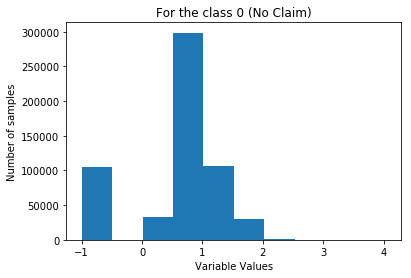

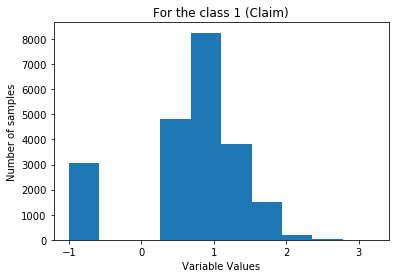

The Mean for the variable  ps_reg_03  is  0.546334927482 for class 0 and  0.546334927482 for class 1 respectively
The STD for the variable  ps_reg_03  is  0.794415971393 for class 0 and  0.794415971393 for class 1 respectively


**Analysis of Variable **ps_car_11

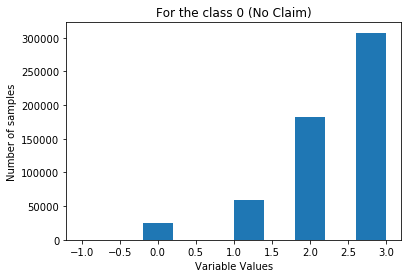

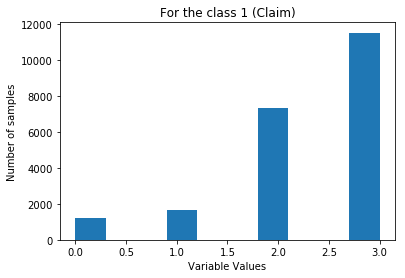

The Mean for the variable  ps_car_11  is  2.34626812062 for class 0 and  2.34626812062 for class 1 respectively
The STD for the variable  ps_car_11  is  0.832024137836 for class 0 and  0.832024137836 for class 1 respectively


**Analysis of Variable **ps_car_12

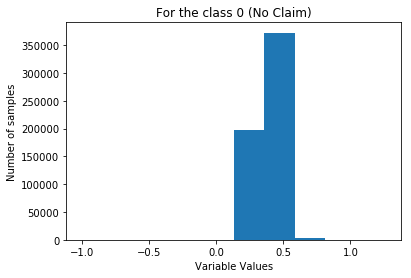

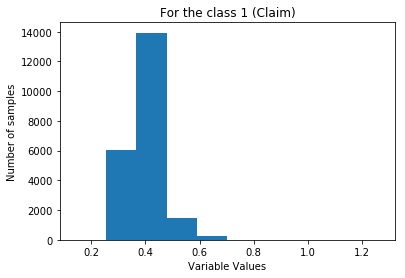

The Mean for the variable  ps_car_12  is  0.379504784287 for class 0 and  0.379504784287 for class 1 respectively
The STD for the variable  ps_car_12  is  0.0580773678307 for class 0 and  0.0580773678307 for class 1 respectively


**Analysis of Variable **ps_car_13

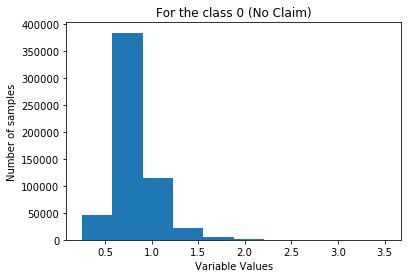

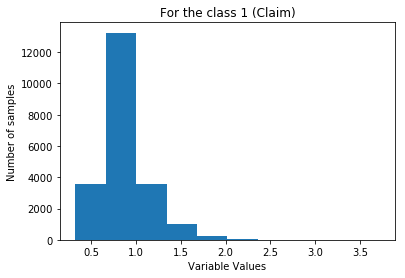

The Mean for the variable  ps_car_13  is  0.810910376781 for class 0 and  0.810910376781 for class 1 respectively
The STD for the variable  ps_car_13  is  0.222710329257 for class 0 and  0.222710329257 for class 1 respectively


**Analysis of Variable **ps_car_14

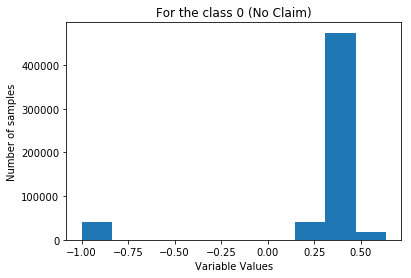

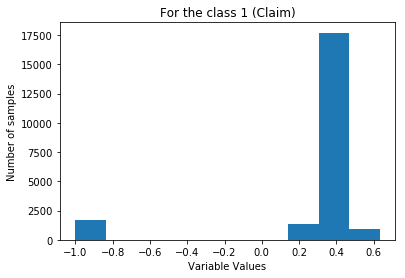

The Mean for the variable  ps_car_14  is  0.276567060253 for class 0 and  0.276567060253 for class 1 respectively
The STD for the variable  ps_car_14  is  0.356435038058 for class 0 and  0.356435038058 for class 1 respectively


**Analysis of Variable **ps_car_15

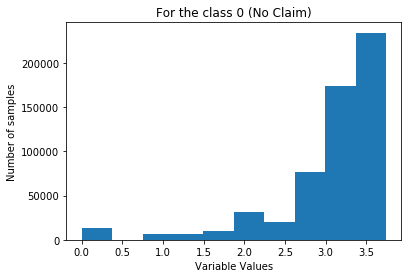

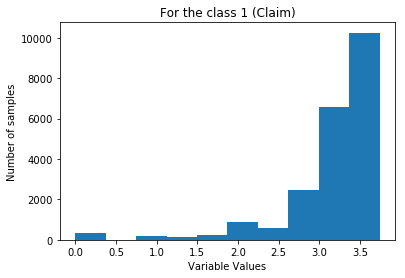

The Mean for the variable  ps_car_15  is  3.061963967 for class 0 and  3.061963967 for class 1 respectively
The STD for the variable  ps_car_15  is  0.734221520396 for class 0 and  0.734221520396 for class 1 respectively


**Analysis of Variable **ps_calc_01

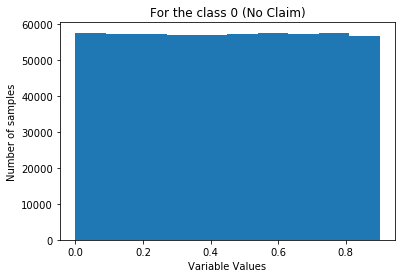

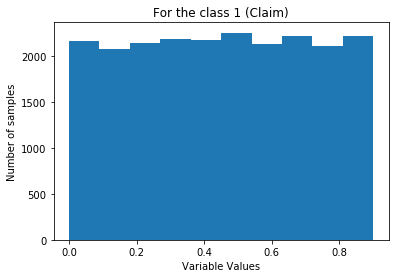

The Mean for the variable  ps_calc_01  is  0.449656854711 for class 0 and  0.449656854711 for class 1 respectively
The STD for the variable  ps_calc_01  is  0.287222774939 for class 0 and  0.287222774939 for class 1 respectively


**Analysis of Variable **ps_calc_02

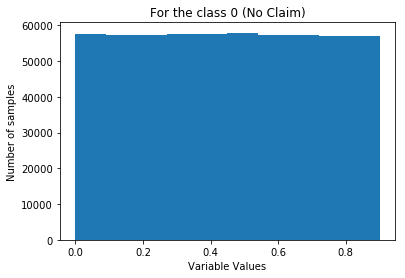

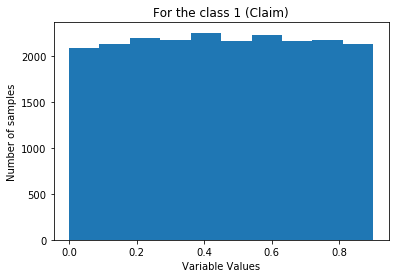

The Mean for the variable  ps_calc_02  is  0.44951335442 for class 0 and  0.44951335442 for class 1 respectively
The STD for the variable  ps_calc_02  is  0.28696128948 for class 0 and  0.28696128948 for class 1 respectively


**Analysis of Variable **ps_calc_03

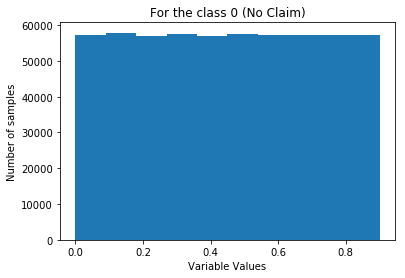

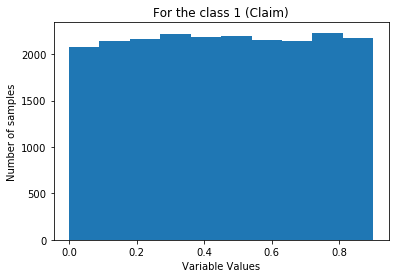

The Mean for the variable  ps_calc_03  is  0.449742292308 for class 0 and  0.449742292308 for class 1 respectively
The STD for the variable  ps_calc_03  is  0.287191295225 for class 0 and  0.287191295225 for class 1 respectively


**Analysis of Variable **ps_calc_04

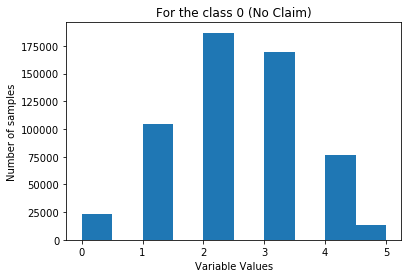

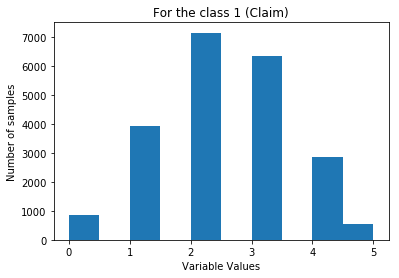

The Mean for the variable  ps_calc_04  is  2.37207376229 for class 0 and  2.37207376229 for class 1 respectively
The STD for the variable  ps_calc_04  is  1.11725203702 for class 0 and  1.11725203702 for class 1 respectively


**Analysis of Variable **ps_calc_05

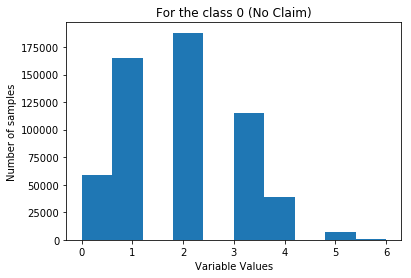

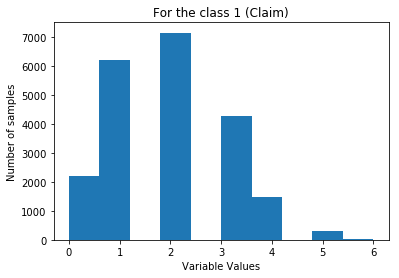

The Mean for the variable  ps_calc_05  is  1.88571587989 for class 0 and  1.88571587989 for class 1 respectively
The STD for the variable  ps_calc_05  is  1.1347329895 for class 0 and  1.1347329895 for class 1 respectively


**Analysis of Variable **ps_calc_06

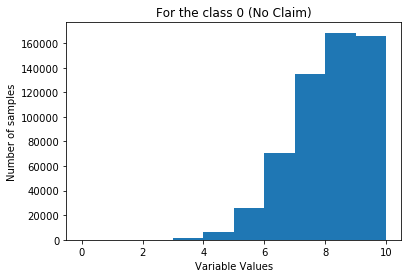

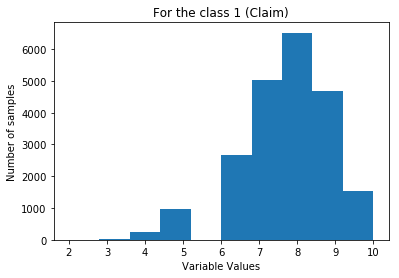

The Mean for the variable  ps_calc_06  is  7.68942387161 for class 0 and  7.68942387161 for class 1 respectively
The STD for the variable  ps_calc_06  is  1.33453791367 for class 0 and  1.33453791367 for class 1 respectively


**Analysis of Variable **ps_calc_07

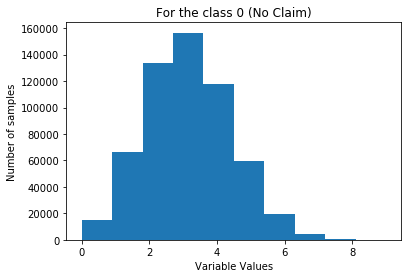

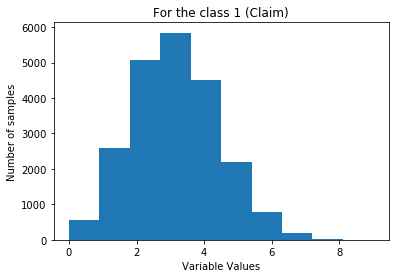

The Mean for the variable  ps_calc_07  is  3.00585160361 for class 0 and  3.00585160361 for class 1 respectively
The STD for the variable  ps_calc_07  is  1.4142162514 for class 0 and  1.4142162514 for class 1 respectively


**Analysis of Variable **ps_calc_08

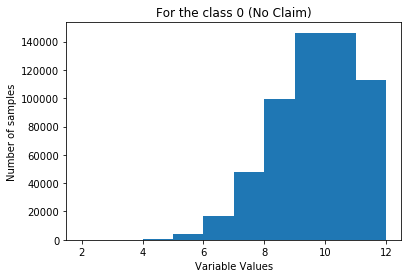

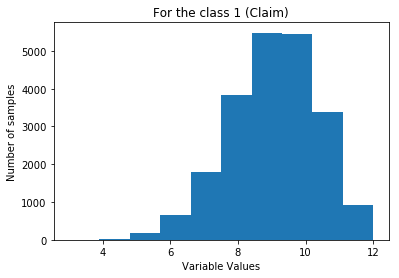

The Mean for the variable  ps_calc_08  is  9.2261899365 for class 0 and  9.2261899365 for class 1 respectively
The STD for the variable  ps_calc_08  is  1.45951558499 for class 0 and  1.45951558499 for class 1 respectively


**Analysis of Variable **ps_calc_09

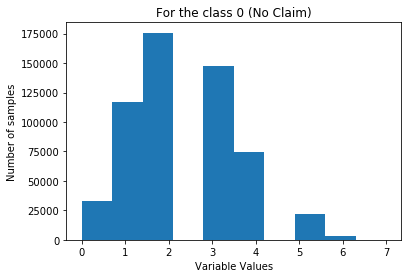

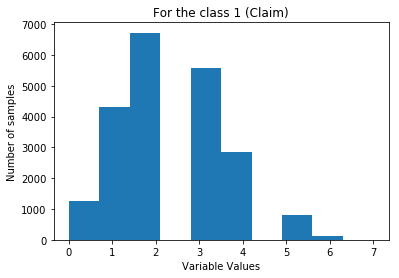

The Mean for the variable  ps_calc_09  is  2.33885946038 for class 0 and  2.33885946038 for class 1 respectively
The STD for the variable  ps_calc_09  is  1.24710296212 for class 0 and  1.24710296212 for class 1 respectively


**Analysis of Variable **ps_calc_10

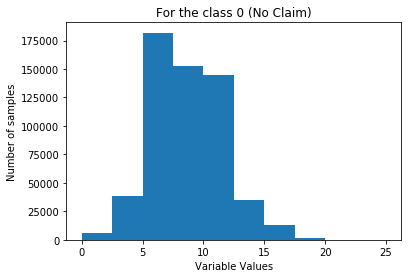

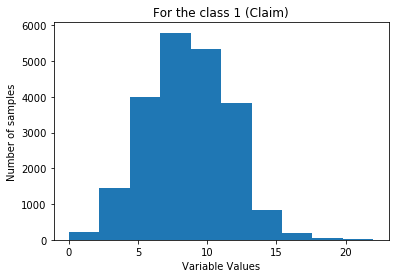

The Mean for the variable  ps_calc_10  is  8.43299076925 for class 0 and  8.43299076925 for class 1 respectively
The STD for the variable  ps_calc_10  is  2.90477970257 for class 0 and  2.90477970257 for class 1 respectively


**Analysis of Variable **ps_calc_11

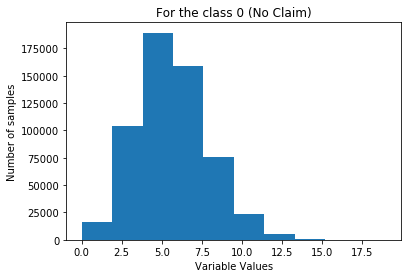

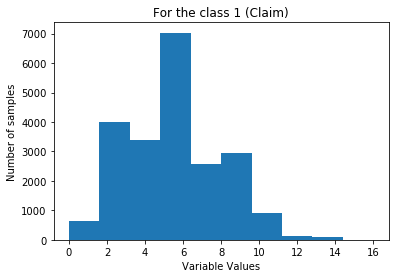

The Mean for the variable  ps_calc_11  is  5.4412137021 for class 0 and  5.4412137021 for class 1 respectively
The STD for the variable  ps_calc_11  is  2.33215163016 for class 0 and  2.33215163016 for class 1 respectively


**Analysis of Variable **ps_calc_12

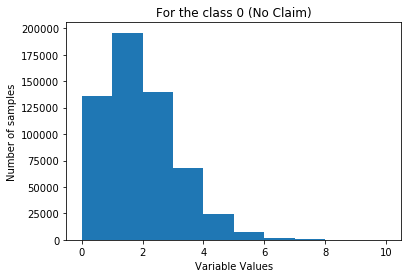

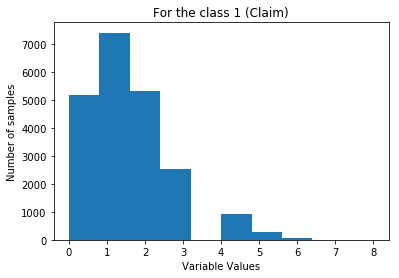

The Mean for the variable  ps_calc_12  is  1.44218315729 for class 0 and  1.44218315729 for class 1 respectively
The STD for the variable  ps_calc_12  is  1.20306477718 for class 0 and  1.20306477718 for class 1 respectively


**Analysis of Variable **ps_calc_13

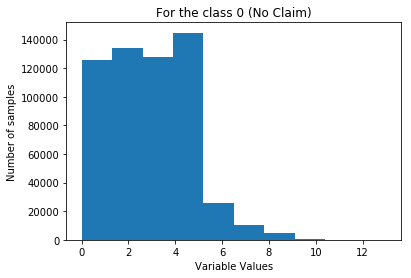

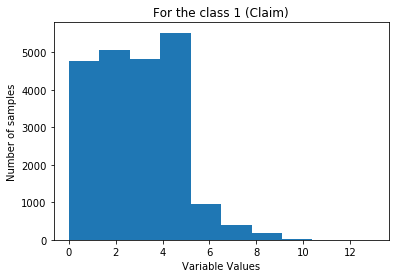

The Mean for the variable  ps_calc_13  is  2.87243469255 for class 0 and  2.87243469255 for class 1 respectively
The STD for the variable  ps_calc_13  is  1.69493391349 for class 0 and  1.69493391349 for class 1 respectively


**Analysis of Variable **ps_calc_14

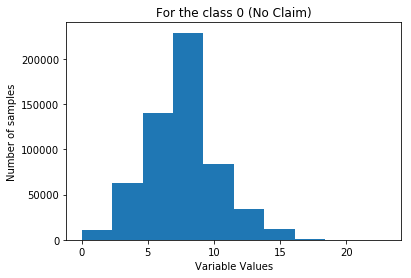

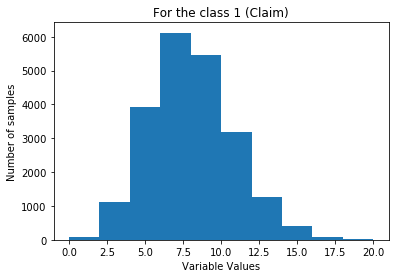

The Mean for the variable  ps_calc_14  is  7.53829871076 for class 0 and  7.53829871076 for class 1 respectively
The STD for the variable  ps_calc_14  is  2.74646353785 for class 0 and  2.74646353785 for class 1 respectively


In [48]:
df1 = df[df.target == 1]
df0 = df[df.target == 0]
for each in continuous_features:
    printmd('**Analysis of Variable **'+str(each))
    var = each
    plt.hist(df0[each])
    plt.title('For the class 0 (No Claim)')
    plt.xlabel('Variable Values')
    plt.ylabel('Number of samples')
    plt.show()
    plt.hist(df1[each])
    plt.title('For the class 1 (Claim)')
    plt.xlabel('Variable Values')
    plt.ylabel('Number of samples')
    plt.show()
    print('The Mean for the variable ', each, ' is ', df0[each].mean(), 'for class 0 and ', df0[each].mean(),'for class 1 respectively' )
    print('The STD for the variable ', each, ' is ', df0[each].std(ddof =1), 'for class 0 and ', df0[each].std(ddof =1),'for class 1 respectively' )
    

# Conclusion


1) The above analysis clearly indicates that there is no significant difference between the continuous variables in these two groups.   
2) It will be difficult for the ML models to learn about them, because there is no variance among these variables in these two diferent
 subsets of data.

# Final Conclusions-

1) Data Set is a mixture of the categorical, binary and the continuous variables.    
2) The target class (binary) is highly imbalanced, with only 3% of samples belonging to the 'CLAIM' class.   
3) Binary variable analysis is conducted to see how strongly each variable is associated with the target variable.     
4) Perason corrleation is conducted to see the relation among the continuous variables.        
5) PCA is done and concluded that 24 PC represents the 100 % of variance, but for sake of simplicity we will keep PC to be 4 only. Hence, reducing the dimensionality.             
6) We also found that our assumption regarding the categorical variables is wrong.     
7) Finally we concluded that there is no variance among the continuous variable of different group of people who claimed and who do not claimed the insurance.     